<a href="https://colab.research.google.com/github/WilkisterMbaka/Electric-car-usage-in-Paris-Data-Analysis/blob/main/Moringa_Data_Science_Prep_W4_Independent_Project_2022_04_Wilkister_Mbaka_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ELECTRIC CAR SHARING SERVICE COMPANY DATA ANALYSIS 
With sample data provided by an electric car-sharing service company. We have been tasked to process stations data to understand electric car usage over time by solving for the following research question;

###**Research Question**

* Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

###**Data Provided**
* Autolib Dataset [http://bit.ly/autolib_dataset]
* Description doc [https://drive.google.com/file/d/13DXF2CFWQLeYxxHFekng8HJnH_jtbfpN/view]

###**Methodolgy of Analysis: CRISP-DM**
* Data Loading
* Data Understanding
* Data Preparation
* Data Analysis
* Recommendation
* Evaluation


# 1.1 Data Loading

In [1]:
# Import libraries

# Import pandas library
import pandas as pd

# Import numpy library
import numpy as np

# Import matplotlib library
import matplotlib.pyplot as plt

In [2]:
# Reading data set from our csv file

df = pd.read_csv('/content/Autolib_dataset (2).csv')

In [3]:
# Preview our dataset
df

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,...,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,...,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,...,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,...,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,...,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,...,NaN,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,...,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,...,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,...,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,...,NaN,3,station,ok,nonexistent,2018,4,4,17,27


# 1.2 Data Understanding

In [4]:
# Accessing information of our dataset

print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.000000,5000.000000
mean,2.333600,2.333600,0.059600,0.123000,0.253400,82634.878400,1.932400,2018.0,4.0,4.941600,11.509200,29.270000
std,2.035274,2.035274,0.246698,0.356506,0.546304,8835.865721,1.905402,0.0,0.0,2.597063,6.893549,17.231741
min,0.000000,0.000000,0.000000,0.000000,0.000000,75001.000000,0.000000,2018.0,4.0,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,75012.000000,0.000000,2018.0,4.0,3.000000,6.000000,14.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,75019.000000,1.000000,2018.0,4.0,5.000000,11.000000,29.000000
75%,4.000000,4.000000,0.000000,0.000000,0.000000,92320.000000,3.000000,2018.0,4.0,7.000000,18.000000,44.000000
max,7.000000,7.000000,2.000000,3.000000,2.000000,95880.000000,7.000000,2018.0,4.0,9.000000,23.000000,59.000000


In [5]:
# Check for missing values

print(df.isnull().sum())

Address                   0
Cars                      0
Bluecar counter           0
Utilib counter            0
Utilib 1.4 counter        0
Charge Slots              0
Charging Status           0
City                      0
Displayed comment      4889
ID                        0
Kind                      0
Geo point                 0
Postal code               0
Public name               0
Rental status             0
Scheduled at           4953
Slots                     0
Station type              0
Status                    0
Subscription status       0
year                      0
month                     0
day                       0
hour                      0
minute                    0
dtype: int64


**DATA UNDERSTANDING**

1. Data set has 5000 rows and 25 columns
2. Displayed comment column has 4889 missing values
3. Scheduled at column has 4953 missing values
4. From the mean of blue cars we can see that they were always atleast 2 vehicles at a station
5. From the mean of slots we can see that they were always atleast 2 parking places per station



# 1.3 Data Preparation

In [6]:
df

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,...,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,...,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,...,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,...,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,...,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,...,NaN,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,...,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,...,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,...,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,...,NaN,3,station,ok,nonexistent,2018,4,4,17,27


## 1.3.1 Validity

In [7]:
# Drop columns that are irrelevant
df.drop(['Address','Cars', 'Displayed comment', 'Geo point', 'ID','Charge Slots','Slots','year','month','Subscription status','Scheduled at'], axis = 1, inplace = True)

In [8]:
# Drop rows that have Kind as center because Center has no reources at all
# RESOURCES: Are Bluecar counter, Utilib counter, Utilib counter 1.4, Charge slots, Slots

df.drop(df[df['Kind'] == 'CENTER'].index, inplace = True)

In [9]:
# Drop rows that have Rental_status as broken because broken has no reources at all except slots
# RESOURCES: Are Bluecar counter, Utilib counter, Utilib counter 1.4, Charge slots, Slots

df.drop(df[df['Rental status'] == 'broken'].index, inplace = True)

In [10]:
# Drop rows that have Rental_status as future because broken has no reources at all
# RESOURCES: Are Bluecar counter, Utilib counter, Utilib counter 1.4, Charge slots, Slots

df.drop(df[df['Rental status'] == 'future'].index, inplace = True)

In [11]:
df.head()

,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charging Status,City,Kind,Postal code,Public name,Rental status,Station type,Status,day,hour,minute
0,0,0,0,nonexistent,Paris,STATION,75015,Paris/Suffren/2,operational,station,ok,8,11,43
1,6,0,0,operational,Paris,STATION,75014,Paris/Raymond Losserand/145,operational,station,ok,6,7,24
2,3,0,2,operational,Le Bourget,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,station,ok,3,20,14
3,3,1,0,operational,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,station,ok,4,4,37
4,3,0,0,nonexistent,Paris,PARKING,75017,Paris/Porte de Champerret/6,operational,station,ok,8,17,23


In [12]:
# Check for white spaces
print(df['Charging Status'].str.isspace().sum())
print(df['City'].str.isspace().sum())
print(df['Kind'].str.isspace().sum())
print(df['Public name'].str.isspace().sum())
print(df['Rental status'].str.isspace().sum())
print(df['Station type'].str.isspace().sum())
print(df['Status'].str.isspace().sum())
print(df.columns.str.isspace().sum())

0
0
0
0
0
0
0
0


## 1.3.2 Accuracy

In [13]:
# None applicable

## 1.3.3 Completeness

In [14]:
# Check for missing values in the dataset
# The scheduled at column has missing values but it is relevant. only those that have future in one of their statuses have values
df.isnull().sum()

Bluecar counter       0
Utilib counter        0
Utilib 1.4 counter    0
Charging Status       0
City                  0
Kind                  0
Postal code           0
Public name           0
Rental status         0
Station type          0
Status                0
day                   0
hour                  0
minute                0
dtype: int64

## 1.3.4 Consistency

In [15]:
# Check for duplicates
duplicate = df[df.duplicated()]

duplicate


,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charging Status,City,Kind,Postal code,Public name,Rental status,Station type,Status,day,hour,minute


## 1.3.5 Uniformity

In [16]:
# Standardisation - Fixing column names
df.columns = df.columns.str.replace(' ','_')

**DATA PREPARATION**

1. Dropped irrelevant columns: Address, Cars, Displayed comment, Geo point, ID,Charge Slots, Slots, year, month, Subscription status, Scheduled at
* Address and ID were similar to Public name so they were dropped
* Cars had same data as Blue car
* Displayed comment, Geo point, Charge Slots, Slots, Subscription status, Scheduled at irrelevant our analysis
* year, month were similar to all rows

2. Dropped rows that had no resources
*RESOURCES: Are Bluecar counter, Utilib counter, Utilib counter 1.4, Charge slots, Slots*
* Drop rows that have Kind as center because Center has no reources at all
* Drop rows that have Rental_status as broken because broken has no reources at all except slots
* Drop rows that have Rental_status as future because broken has no reources at all

3. Fixed column names by replacing spaces with underscores


# 1.4 Data Analysis

## 1.4.1 Bluecar

In [17]:
# Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.
df.head()

,Bluecar_counter,Utilib_counter,Utilib_1.4_counter,Charging_Status,City,Kind,Postal_code,Public_name,Rental_status,Station_type,Status,day,hour,minute
0,0,0,0,nonexistent,Paris,STATION,75015,Paris/Suffren/2,operational,station,ok,8,11,43
1,6,0,0,operational,Paris,STATION,75014,Paris/Raymond Losserand/145,operational,station,ok,6,7,24
2,3,0,2,operational,Le Bourget,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,station,ok,3,20,14
3,3,1,0,operational,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,station,ok,4,4,37
4,3,0,0,nonexistent,Paris,PARKING,75017,Paris/Porte de Champerret/6,operational,station,ok,8,17,23


In [18]:
# Filter out rows that have their city as Paris
df_paris = df[df['City'] == 'Paris']
df_paris

,Bluecar_counter,Utilib_counter,Utilib_1.4_counter,Charging_Status,City,Kind,Postal_code,Public_name,Rental_status,Station_type,Status,day,hour,minute
0,0,0,0,nonexistent,Paris,STATION,75015,Paris/Suffren/2,operational,station,ok,8,11,43
1,6,0,0,operational,Paris,STATION,75014,Paris/Raymond Losserand/145,operational,station,ok,6,7,24
3,3,1,0,operational,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,station,ok,4,4,37
4,3,0,0,nonexistent,Paris,PARKING,75017,Paris/Porte de Champerret/6,operational,station,ok,8,17,23
5,0,0,0,nonexistent,Paris,STATION,75011,Paris/Voltaire/8,operational,station,ok,6,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,0,0,0,operational,Paris,STATION,75013,Paris/Ivry/3,operational,station,ok,9,23,1
4994,0,0,0,operational,Paris,STATION,75010,Paris/Rocroy/15,operational,station,ok,1,20,49
4996,4,0,0,operational,Paris,STATION,75015,Paris/Dantzig/37,operational,station,ok,4,16,56
4997,1,0,0,operational,Paris,STATION,75007,Paris/Bac/142,operational,station,ok,1,7,1


In [19]:
# Sort the dataset in the order of: Public_name, day, hour,minute
df_paris = df_paris.sort_values(by=['Public_name', 'day', 'hour','minute'])

# Group the dataset with the station name (to know cars in and out per station) and then get the difference of current row minus previous row with .diff
  # negative number - car(s) were picked up
  # positive bumber - car(s) were returned to the station
  # zero (0) - No pick or drop off

df_paris['diff'] = df_paris.groupby(['Public_name'])['Bluecar_counter'].diff().fillna(0)

In [20]:
# Multiply the diff column with -1 to change the negative numbers to positive numbers for easier summation
df_paris['diff_positive'] = df_paris['diff'] * -1

In [21]:
df_paris.head()

,Bluecar_counter,Utilib_counter,Utilib_1.4_counter,Charging_Status,City,Kind,Postal_code,Public_name,Rental_status,Station_type,Status,day,hour,minute,diff,diff_positive
710,1,0,0,nonexistent,Paris,STATION,75014,Paris/25 AoÃ»t 1944/8,operational,station,ok,1,18,40,0.0,-0.0
1891,4,0,0,nonexistent,Paris,STATION,75014,Paris/25 AoÃ»t 1944/8,operational,station,ok,2,7,37,3.0,-3.0
2312,2,0,0,nonexistent,Paris,STATION,75014,Paris/25 AoÃ»t 1944/8,operational,station,ok,2,12,49,-2.0,2.0
911,3,0,0,nonexistent,Paris,STATION,75014,Paris/25 AoÃ»t 1944/8,operational,station,ok,4,3,10,1.0,-1.0
4940,1,0,0,nonexistent,Paris,STATION,75014,Paris/25 AoÃ»t 1944/8,operational,station,ok,4,18,48,-2.0,2.0


Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

      diff_positive
hour               
21            109.0


Text(0.5, 1.0, 'Number of bluecars picked per hour')

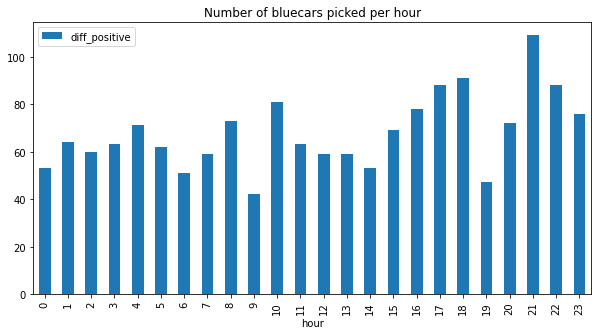

In [22]:
# Filter out the positive number from the diff_positive column (to be able to sum up picked up cars)
df_paris_cars_pick = df_paris[df_paris['diff_positive'] > 0]
df_paris_cars_pick

# Groupby hour and sum up cars taken in that hour then get the most popular hour for picking up cars

print(df_paris_cars_pick[['hour','diff_positive']].groupby('hour').sum().nlargest(1,'diff_positive'))
df_paris_cars_pick[['hour','diff_positive']].groupby('hour').sum().plot.bar(figsize = (10, 5))
plt.title('Number of bluecars picked per hour')


**Hour** 21 is the most popular for picking up blue cars

What is the most popular hour for returning cars?

In [23]:
# Filter out the positive number from the diff column (to be able to sum up dropped up cars)
df_paris_cars_drop = df_paris[df_paris['diff'] > 0]
df_paris_cars_drop

# Groupby hour and sum up cars taken in that hour then get the most popular hour for dropping up cars

df_paris_cars_drop[['hour','diff']].groupby('hour').sum().nlargest(1,'diff')

,diff
hour,
9,101.0


What station is the most popular

In [24]:
# overall

# Groupby public name and sum up cars taken from that station 

df_paris_cars_pick[['Public_name', 'diff_positive']].groupby('Public_name').sum().nlargest(1,'diff_positive')

,diff_positive
Public_name,
Paris/Porte de Montrouge/8,19.0


In [25]:
# At the most popular picking hour?

# Filter out the positive number from the diff_positive column (to be able to sum up picked up cars) and the most popular hour
df_paris_cars_pick = df_paris[(df_paris['diff_positive'] > 0) & (df_paris['hour'] == 21)]
df_paris_cars_pick

# Groupby hour and sum up cars taken in that hour then get the most popular hour for picking up cars

df_paris_cars_pick[['Public_name','diff_positive']].groupby('Public_name').sum().nlargest(2,'diff_positive')

,diff_positive
Public_name,
Paris/HÃ´pital/47,6.0
Paris/Tronchet/19,6.0


Paris/HÃ´pital/47            6.0
Paris/Tronchet/19            6.0

What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?

In [26]:
# overall

# Filter out the positive number from the diff_positive column (to be able to sum up picked up cars)
df_paris_cars_pick = df_paris[df_paris['diff_positive'] > 0]
df_paris_cars_pick

# Groupby hour and sum up cars taken in that hour then get the most popular hour for picking up cars

df_paris_cars_pick[['Postal_code','diff_positive']].groupby('Postal_code').sum().nlargest(1,'diff_positive')

,diff_positive
Postal_code,
75015,175.0


In [27]:
# Does the most popular station belong to that postal code
# NO

df_paris['Postal_code'][df_paris['Public_name'] == 'Paris/Porte de Montrouge/8'].unique()

array([75014])

In [28]:
# At the most popular picking hour?

# Filter out the positive number from the diff_positive column (to be able to sum up picked up cars) and the most popular hour
df_paris_cars_pick = df_paris[(df_paris['diff_positive'] > 0) & (df_paris['hour'] == 21)]
df_paris_cars_pick

# Groupby postal code and sum up cars taken in that hour then get the most popular postal code for picking up cars

df_paris_cars_pick[['Postal_code','diff_positive']].groupby('Postal_code').sum().nlargest(1,'diff_positive')

,diff_positive
Postal_code,
75013,17.0


**Bluecar Observations**

1. The most popular hour of the day is 9.00 PM
2. The most popular hour for returning cars 9.00 AM
3. The most popular station:
>* Overall : Paris/Porte de Montrouge/8 with 19 pickups
>* At the most popular picking hour: Paris/HÃ´pital/47 and Paris/Tronchet/19 with 6 pick ups each
4. The most popular postal code for picking up Blue cars
>* Overall: 75015 with 175 pickups
                        Does the most popular station belong to that postal code?
  NO, the most popular station has a postal code of 75014
>* At the most popular picking hour: 75013 with 17 pickups






## 1.4.2 Utilib

In [29]:
# Sort the dataset in the order of: Public_name, day, hour,minute
df_paris = df_paris.sort_values(by=['Public_name', 'day', 'hour','minute'])

# Group the dataset with the station name (to know cars in and out per station) and then get the difference of current row minus previous row with .diff
  # negative number - car(s) were picked up
  # positive bumber - car(s) were returned to the station
  # zero (0) - No pick or drop off

df_paris['diff_utilib'] = df_paris.groupby(['Public_name'])['Utilib_counter'].diff().fillna(0)

In [30]:
# Multiply the diff_utilib column with -1 to change the negative numbers to positive numbers for easier summation
df_paris['diff_utilib_pstv'] = df_paris['diff_utilib'] * -1
df_paris.head()

,Bluecar_counter,Utilib_counter,Utilib_1.4_counter,Charging_Status,City,Kind,Postal_code,Public_name,Rental_status,Station_type,Status,day,hour,minute,diff,diff_positive,diff_utilib,diff_utilib_pstv
710,1,0,0,nonexistent,Paris,STATION,75014,Paris/25 AoÃ»t 1944/8,operational,station,ok,1,18,40,0.0,-0.0,0.0,-0.0
1891,4,0,0,nonexistent,Paris,STATION,75014,Paris/25 AoÃ»t 1944/8,operational,station,ok,2,7,37,3.0,-3.0,0.0,-0.0
2312,2,0,0,nonexistent,Paris,STATION,75014,Paris/25 AoÃ»t 1944/8,operational,station,ok,2,12,49,-2.0,2.0,0.0,-0.0
911,3,0,0,nonexistent,Paris,STATION,75014,Paris/25 AoÃ»t 1944/8,operational,station,ok,4,3,10,1.0,-1.0,0.0,-0.0
4940,1,0,0,nonexistent,Paris,STATION,75014,Paris/25 AoÃ»t 1944/8,operational,station,ok,4,18,48,-2.0,2.0,0.0,-0.0


Identify the most popular hour of the day for picking up a utilib in the city of Paris over the month of April 2018.

      diff_utilib_pstv
hour                  
10                 8.0
12                 8.0
21                 8.0
23                 8.0


Text(0.5, 1.0, 'Number picked utilib cars per hour')

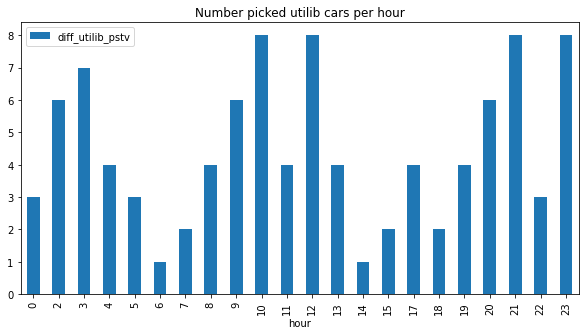

In [31]:
# Filter out the positive number from the diff_utilib_pstv column (to be able to sum up picked up cars)
df_paris_cars_pick = df_paris[df_paris['diff_utilib_pstv'] > 0]
df_paris_cars_pick

# Groupby hour and sum up cars taken in that hour then get the most popular hour for picking up cars

print(df_paris_cars_pick[['hour','diff_utilib_pstv']].groupby('hour').sum().nlargest(4,'diff_utilib_pstv'))
df_paris_cars_pick[['hour','diff_utilib_pstv']].groupby('hour').sum().plot.bar(figsize = (10, 5))
plt.title('Number picked utilib cars per hour')


Hour 10, 12, 21 and 23 are the most popular hours for picking up a utilib

What is the most popular hour for returning cars?

In [32]:
# Filter out the positive number from the diff_utilib column (to be able to sum up dropped up cars)
df_paris_cars_drop = df_paris[df_paris['diff_utilib'] > 0]
df_paris_cars_drop

# Groupby hour and sum up cars taken in that hour then get the most popular hour for dropping up cars

df_paris_cars_drop[['hour','diff_utilib']].groupby('hour').sum().nlargest(2,'diff_utilib')

,diff_utilib
hour,
6,9.0
8,9.0


What station is the most popular

In [33]:
# overall

# Groupby public name and sum up cars taken from that station 

df_paris_cars_pick[['Public_name', 'diff_utilib_pstv']].groupby('Public_name').sum().nlargest(1,'diff_utilib_pstv')

,diff_utilib_pstv
Public_name,
Paris/HÃ©ricart/54,3.0


In [34]:
# At the most popular picking hour?

# Filter out the positive number from the diff_utilib_pstv column (to be able to sum up picked up cars) and the most popular hour
df_paris_cars_pick = df_paris[(df_paris['diff_utilib_pstv'] > 0) & (df_paris['hour'] == 12)]
df_paris_cars_pick

# Groupby hour and sum up cars taken in that hour then get the most popular hour for picking up cars

df_paris_cars_pick[['Public_name','diff_utilib_pstv']].groupby('Public_name').sum().nlargest(1,'diff_utilib_pstv')

,diff_utilib_pstv
Public_name,
Paris/Chateaubriand/19,2.0


What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?

In [35]:
# overall

# Filter out the positive number from the diff_utilib_pstv column (to be able to sum up picked up cars)
df_paris_cars_pick = df_paris[df_paris['diff_utilib_pstv'] > 0]
df_paris_cars_pick

# Groupby hour and sum up cars taken in that hour then get the most popular hour for picking up cars

df_paris_cars_pick[['Postal_code','diff_utilib_pstv']].groupby('Postal_code').sum().nlargest(1,'diff_utilib_pstv')

,diff_utilib_pstv
Postal_code,
75015,15.0


In [36]:
# Does the most popular station belong to that postal code
# NO

df_paris['Postal_code'][df_paris['Public_name'] == 'Paris/HÃ©ricart/54'].unique()

array([75015])

In [37]:
# At the most popular picking hour?

# Filter out the positive number from the diff_utilib_pstv column (to be able to sum up picked up cars) and the most popular hour
df_paris_cars_pick = df_paris[(df_paris['diff_utilib_pstv'] > 0) & (df_paris['hour'] == 8)]
df_paris_cars_pick

# Groupby postal code and sum up cars taken in that hour then get the most popular postal code for picking up cars

df_paris_cars_pick[['Postal_code','diff_utilib_pstv']].groupby('Postal_code').sum().nlargest(1,'diff_utilib_pstv')

,diff_utilib_pstv
Postal_code,
75010,2.0


**Utilib Observations**

1. The most popular hour of the day is 10.00 AM, 12.00 noon, 9.00 PM, 11.00 PM
2. The most popular hour for returning cars 6.00 AM and 8.00 AM
3. The most popular station:
>* Overall : Paris/HÃ©ricart/54
>* At the most popular picking hour: Paris/Chateaubriand/19
4. The most popular postal code for picking up Utilib cars
>* Overall: 75015 
                        Does the most popular station belong to that postal code?
  YES
>* At the most popular picking hour: 75010 

## 1.4.3 Utilib 1.4

In [38]:
df_paris.head()

,Bluecar_counter,Utilib_counter,Utilib_1.4_counter,Charging_Status,City,Kind,Postal_code,Public_name,Rental_status,Station_type,Status,day,hour,minute,diff,diff_positive,diff_utilib,diff_utilib_pstv
710,1,0,0,nonexistent,Paris,STATION,75014,Paris/25 AoÃ»t 1944/8,operational,station,ok,1,18,40,0.0,-0.0,0.0,-0.0
1891,4,0,0,nonexistent,Paris,STATION,75014,Paris/25 AoÃ»t 1944/8,operational,station,ok,2,7,37,3.0,-3.0,0.0,-0.0
2312,2,0,0,nonexistent,Paris,STATION,75014,Paris/25 AoÃ»t 1944/8,operational,station,ok,2,12,49,-2.0,2.0,0.0,-0.0
911,3,0,0,nonexistent,Paris,STATION,75014,Paris/25 AoÃ»t 1944/8,operational,station,ok,4,3,10,1.0,-1.0,0.0,-0.0
4940,1,0,0,nonexistent,Paris,STATION,75014,Paris/25 AoÃ»t 1944/8,operational,station,ok,4,18,48,-2.0,2.0,0.0,-0.0


In [39]:
# Sort the dataset in the order of: Public_name, day, hour,minute
df_paris = df_paris.sort_values(by=['Public_name', 'day', 'hour','minute'])

# Group the dataset with the station name (to know cars in and out per station) and then get the difference of current row minus previous row with .diff
  # negative number - car(s) were picked up
  # positive bumber - car(s) were returned to the station
  # zero (0) - No pick or drop off

df_paris['diff_utilib1.4'] = df_paris.groupby(['Public_name'])['Utilib_1.4_counter'].diff().fillna(0)

In [40]:
# Multiply the diff_utilib1.4 column with -1 to change the negative numbers to positive numbers for easier summation
df_paris['diff_utilib1.4.pstv'] = df_paris['diff_utilib1.4'] * -1
df_paris.head()

,Bluecar_counter,Utilib_counter,Utilib_1.4_counter,Charging_Status,City,Kind,Postal_code,Public_name,Rental_status,Station_type,Status,day,hour,minute,diff,diff_positive,diff_utilib,diff_utilib_pstv,diff_utilib1.4,diff_utilib1.4.pstv
710,1,0,0,nonexistent,Paris,STATION,75014,Paris/25 AoÃ»t 1944/8,operational,station,ok,1,18,40,0.0,-0.0,0.0,-0.0,0.0,-0.0
1891,4,0,0,nonexistent,Paris,STATION,75014,Paris/25 AoÃ»t 1944/8,operational,station,ok,2,7,37,3.0,-3.0,0.0,-0.0,0.0,-0.0
2312,2,0,0,nonexistent,Paris,STATION,75014,Paris/25 AoÃ»t 1944/8,operational,station,ok,2,12,49,-2.0,2.0,0.0,-0.0,0.0,-0.0
911,3,0,0,nonexistent,Paris,STATION,75014,Paris/25 AoÃ»t 1944/8,operational,station,ok,4,3,10,1.0,-1.0,0.0,-0.0,0.0,-0.0
4940,1,0,0,nonexistent,Paris,STATION,75014,Paris/25 AoÃ»t 1944/8,operational,station,ok,4,18,48,-2.0,2.0,0.0,-0.0,0.0,-0.0


Identify the most popular hour of the day for picking up a utilib 1.4 in the city of Paris over the month of April 2018.

      diff_utilib1.4.pstv
hour                     
11                   16.0
18                   16.0


Text(0.5, 1.0, 'Number picked utilib 1.4 cars per hour')

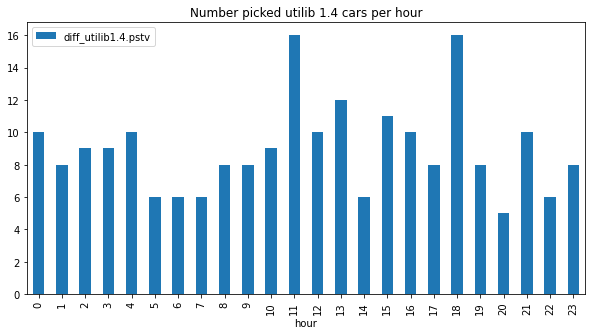

In [41]:
# Filter out the positive number from the diff_utilib1.4.pstv column (to be able to sum up picked up cars)
df_paris_cars_pick = df_paris[df_paris['diff_utilib1.4.pstv'] > 0]
df_paris_cars_pick

# Groupby hour and sum up cars taken in that hour then get the most popular hour for picking up cars

print(df_paris_cars_pick[['hour','diff_utilib1.4.pstv']].groupby('hour').sum().nlargest(2,'diff_utilib1.4.pstv'))
df_paris_cars_pick[['hour','diff_utilib1.4.pstv']].groupby('hour').sum().plot.bar(figsize = (10, 5))
plt.title('Number picked utilib 1.4 cars per hour')

Hour 11 and 18 are the most popular hours for picking up utilib 1.4

What is the most popular hour for returning cars?

In [42]:
# Filter out the positive number from the diff_utilib1.4 column (to be able to sum up dropped up cars)
df_paris_cars_drop = df_paris[df_paris['diff_utilib1.4'] > 0]
df_paris_cars_drop

# Groupby hour and sum up cars taken in that hour then get the most popular hour for dropping up cars

df_paris_cars_drop[['hour','diff_utilib1.4']].groupby('hour').sum().nlargest(1,'diff_utilib1.4')

,diff_utilib1.4
hour,
21,16.0


What station is the most popular?

In [43]:
# overall

# Groupby public name and sum up cars taken from that station 

df_paris_cars_pick[['Public_name', 'diff_utilib1.4.pstv']].groupby('Public_name').sum().nlargest(1,'diff_utilib1.4.pstv')

,diff_utilib1.4.pstv
Public_name,
Paris/FÃ©lix Faure/109,3.0


In [44]:
# At the most popular picking hour?

# Filter out the positive number from the diff_utilib1.4.pstv column (to be able to sum up picked up cars) and the most popular hour
df_paris_cars_pick = df_paris[(df_paris['diff_utilib1.4.pstv'] > 0) & (df_paris['hour'] == 11)]
df_paris_cars_pick

# Groupby hour and sum up cars taken in that hour then get the most popular hour for picking up cars

df_paris_cars_pick[['Public_name','diff_utilib1.4.pstv']].groupby('Public_name').sum().nlargest(2,'diff_utilib1.4.pstv')

,diff_utilib1.4.pstv
Public_name,
Paris/Jules LefÃ¨bvre/1,2.0
Paris/Raymond Pitet/7,2.0


What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?

In [45]:
# overall

# Filter out the positive number from the diff_utilib1.4.pstv column (to be able to sum up picked up cars)
df_paris_cars_pick = df_paris[df_paris['diff_utilib1.4.pstv'] > 0]
df_paris_cars_pick

# Groupby hour and sum up cars taken in that hour then get the most popular hour for picking up cars

df_paris_cars_pick[['Postal_code','diff_utilib1.4.pstv']].groupby('Postal_code').sum().nlargest(1,'diff_utilib1.4.pstv')

,diff_utilib1.4.pstv
Postal_code,
75017,26.0


In [46]:
# Does the most popular station belong to that postal code
# YES

df_paris['Postal_code'][(df_paris['Public_name'] == 'Paris/Jules LefÃ¨bvre/1') | (df_paris['Public_name'] == 'Paris/Raymond Pitet/7')].unique()

array([75009, 75017])

In [47]:
# At the most popular picking hour?

# Filter out the positive number from the diff_utilib1.4.pstv column (to be able to sum up picked up cars) and the most popular hour
df_paris_cars_pick = df_paris[(df_paris['diff_utilib1.4.pstv'] > 0) & (df_paris['hour'] == 11)]
df_paris_cars_pick

# Groupby postal code and sum up cars taken in that hour then get the most popular postal code for picking up cars

df_paris_cars_pick[['Postal_code','diff_utilib1.4.pstv']].groupby('Postal_code').sum().nlargest(1,'diff_utilib1.4.pstv')

,diff_utilib1.4.pstv
Postal_code,
75017,7.0


**Utilib 1.4 Observations**

1. The most popular hour of the day is 11.00 AM, 6.00 PM
2. The most popular hour for returning cars 9.00 PM
3. The most popular station:
>* Overall : Paris/FÃ©lix Faure/109
>* At the most popular picking hour: Paris/Jules LefÃ¨bvre/1 and Paris/Raymond Pitet/7
4. The most popular postal code for picking up Utilib 1.4
>* Overall: 75017 
                        Does the most popular station belong to that postal code?
  YES
>* At the most popular picking hour: 75017

# 1.5 Recommendation

From our analysis we would recommend that Autolib require users to return **bluecars** taken in the morning before **9.00 PM** as that is the most popular hour to pick cars. They can consider after car return checks and cleaning and give themselves ample time to prep the car for the next client 

From our analysis we would recommend that Autolib require users to return **utilibs** taken in the morning before **9.00 PM** as that is the most popular hour to pick cars.  The **utilibs** taken at night to be returned before **10.00 AM**. They can consider after car return checks and cleaning and give themselves ample time to prep the car for the next client 

From our analysis we would recommend that Autolib require users to return **utilibs 1.4** taken in the morning before **6.00 PM** as that is the most popular hour to pick cars.  The **utilibs 1.4** taken at night to be returned before **11.00 AM**. They can consider after car return checks and cleaning and give themselves ample time to prep the car for the next client

Autolib can consider adding more stations in the postal code **75015** as it is the most popular postal code for both bluecars and utilibs.

Check if the popular stations are overworked and add more stations where necessary for better customer service.


# 1.6 Evaluation

The overall results of the Autolib data analysis are fairly easy to communicate from a business perspective. The analysis produced insights into how customers ride the cars, the popular stations and postal codes, and also popular hours which the company can use to formulate their policies on returns and to better their customer’s experience.

**Ranking the Recommendations**. To attract more consumers, the customer experience must be topnotch especially for things such as having a car available at all times especially peak hours. 

**New Questions**. Analyze all data from  autolib not just from Paris to understand from the company’s standpoint
